In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import set_config

<h2>The goal is to determine if a patient could have whether benign or malignant using the breast cancer dataset </h2>

In [2]:
# Create dataframe from csv-format data
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# First, encoding non-numerical variables for the dataframe (only these to use).
# For the new "diagnosis_idx" variable: 1:M, 0:B

le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# remove non-interesting variables/columns from dataframe
df.drop(['id', 'Unnamed: 32'], inplace=True, axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# search for null or missing values.
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

From the above result, there are not null or missing values. Therefore, it is not needed
to impute values or no consideration of some samples/rows.

In [6]:
# Select features (X) and the target (y)
y = df[['diagnosis']]
X = df.drop(y, axis=1)

In [7]:
# split the sample in (85%) for training and (15%) for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

For tree-based algorithms is not needed to perform some scalling transformation, due to they are not
sensitive to this change.

In [8]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 4, 6, 8, 10]
              }

estimator = DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV

# create grid to obtain the best hyperparams
search = GridSearchCV(estimator=estimator,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10,
                      refit=True,
                      n_jobs=-1)

search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [10]:
print(f'best params: {search.best_params_}')
print(f'best score:  {search.best_score_}')

cv_GridScore_mean = round( search.cv_results_["mean_test_score"].mean()*100 , 2)
cv_GridScore_std  = round( search.cv_results_["std_test_score"].mean()*100 , 2)

# This mean score is computed for all models in the grid, not for the best model
print(f'mean score: ({cv_GridScore_mean} +- {cv_GridScore_std})')

best params: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}
best score:  0.9460459183673467
mean score: (92.6 +- 3.65)


In [11]:
# Next, are shown the accuracy on the training samples for each fold
search.cv_results_["mean_test_score"]

array([0.90272109, 0.89455782, 0.93363095, 0.9130102 , 0.93771259,
       0.93996599, 0.93367347, 0.94604592, 0.9295068 , 0.93588435,
       0.89642857, 0.87172619, 0.93979592, 0.9232568 , 0.94183673,
       0.9170068 , 0.94387755, 0.9420068 , 0.94387755, 0.93367347])

Now, we will pick up the best model from the grid and we will apply cross validation on it.

In [12]:
from sklearn.metrics import accuracy_score

# we pick the best estimator from the grid
best_estimator = search.best_estimator_

y_pred = best_estimator.predict(X_test)
accuracy = best_estimator.score(X_test, y_test)

# the next, will be the accuracy on the test sample
print(accuracy)

0.9186046511627907


In [13]:
from sklearn.model_selection import cross_val_score

# The cross validation is applied on the training sample. Now, using the best model
cv_score = cross_val_score(estimator=best_estimator,
                           X=X_train, y=y_train, cv=10, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100,  2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(94.6 +- 2.98)%


In [14]:
from sklearn.tree import export_text, plot_tree

print(export_text(best_estimator, feature_names=X.columns))

|--- concave points_mean <= 0.04
|   |--- radius_worst <= 17.73
|   |   |--- area_se <= 86.99
|   |   |   |--- perimeter_worst <= 101.65
|   |   |   |   |--- perimeter_se <= 3.55
|   |   |   |   |   |--- concave points_mean <= 0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- concave points_mean >  0.03
|   |   |   |   |   |   |--- concave points_mean <= 0.03
|   |   |   |   |   |   |   |--- texture_worst <= 30.60
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- texture_worst >  30.60
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- concave points_mean >  0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- perimeter_se >  3.55
|   |   |   |   |   |--- compactness_se <= 0.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- compactness_se >  0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- perimeter_worst >  101.65
|   |   |   |   |--- texture_worst <= 34.70
|   |   |   |   

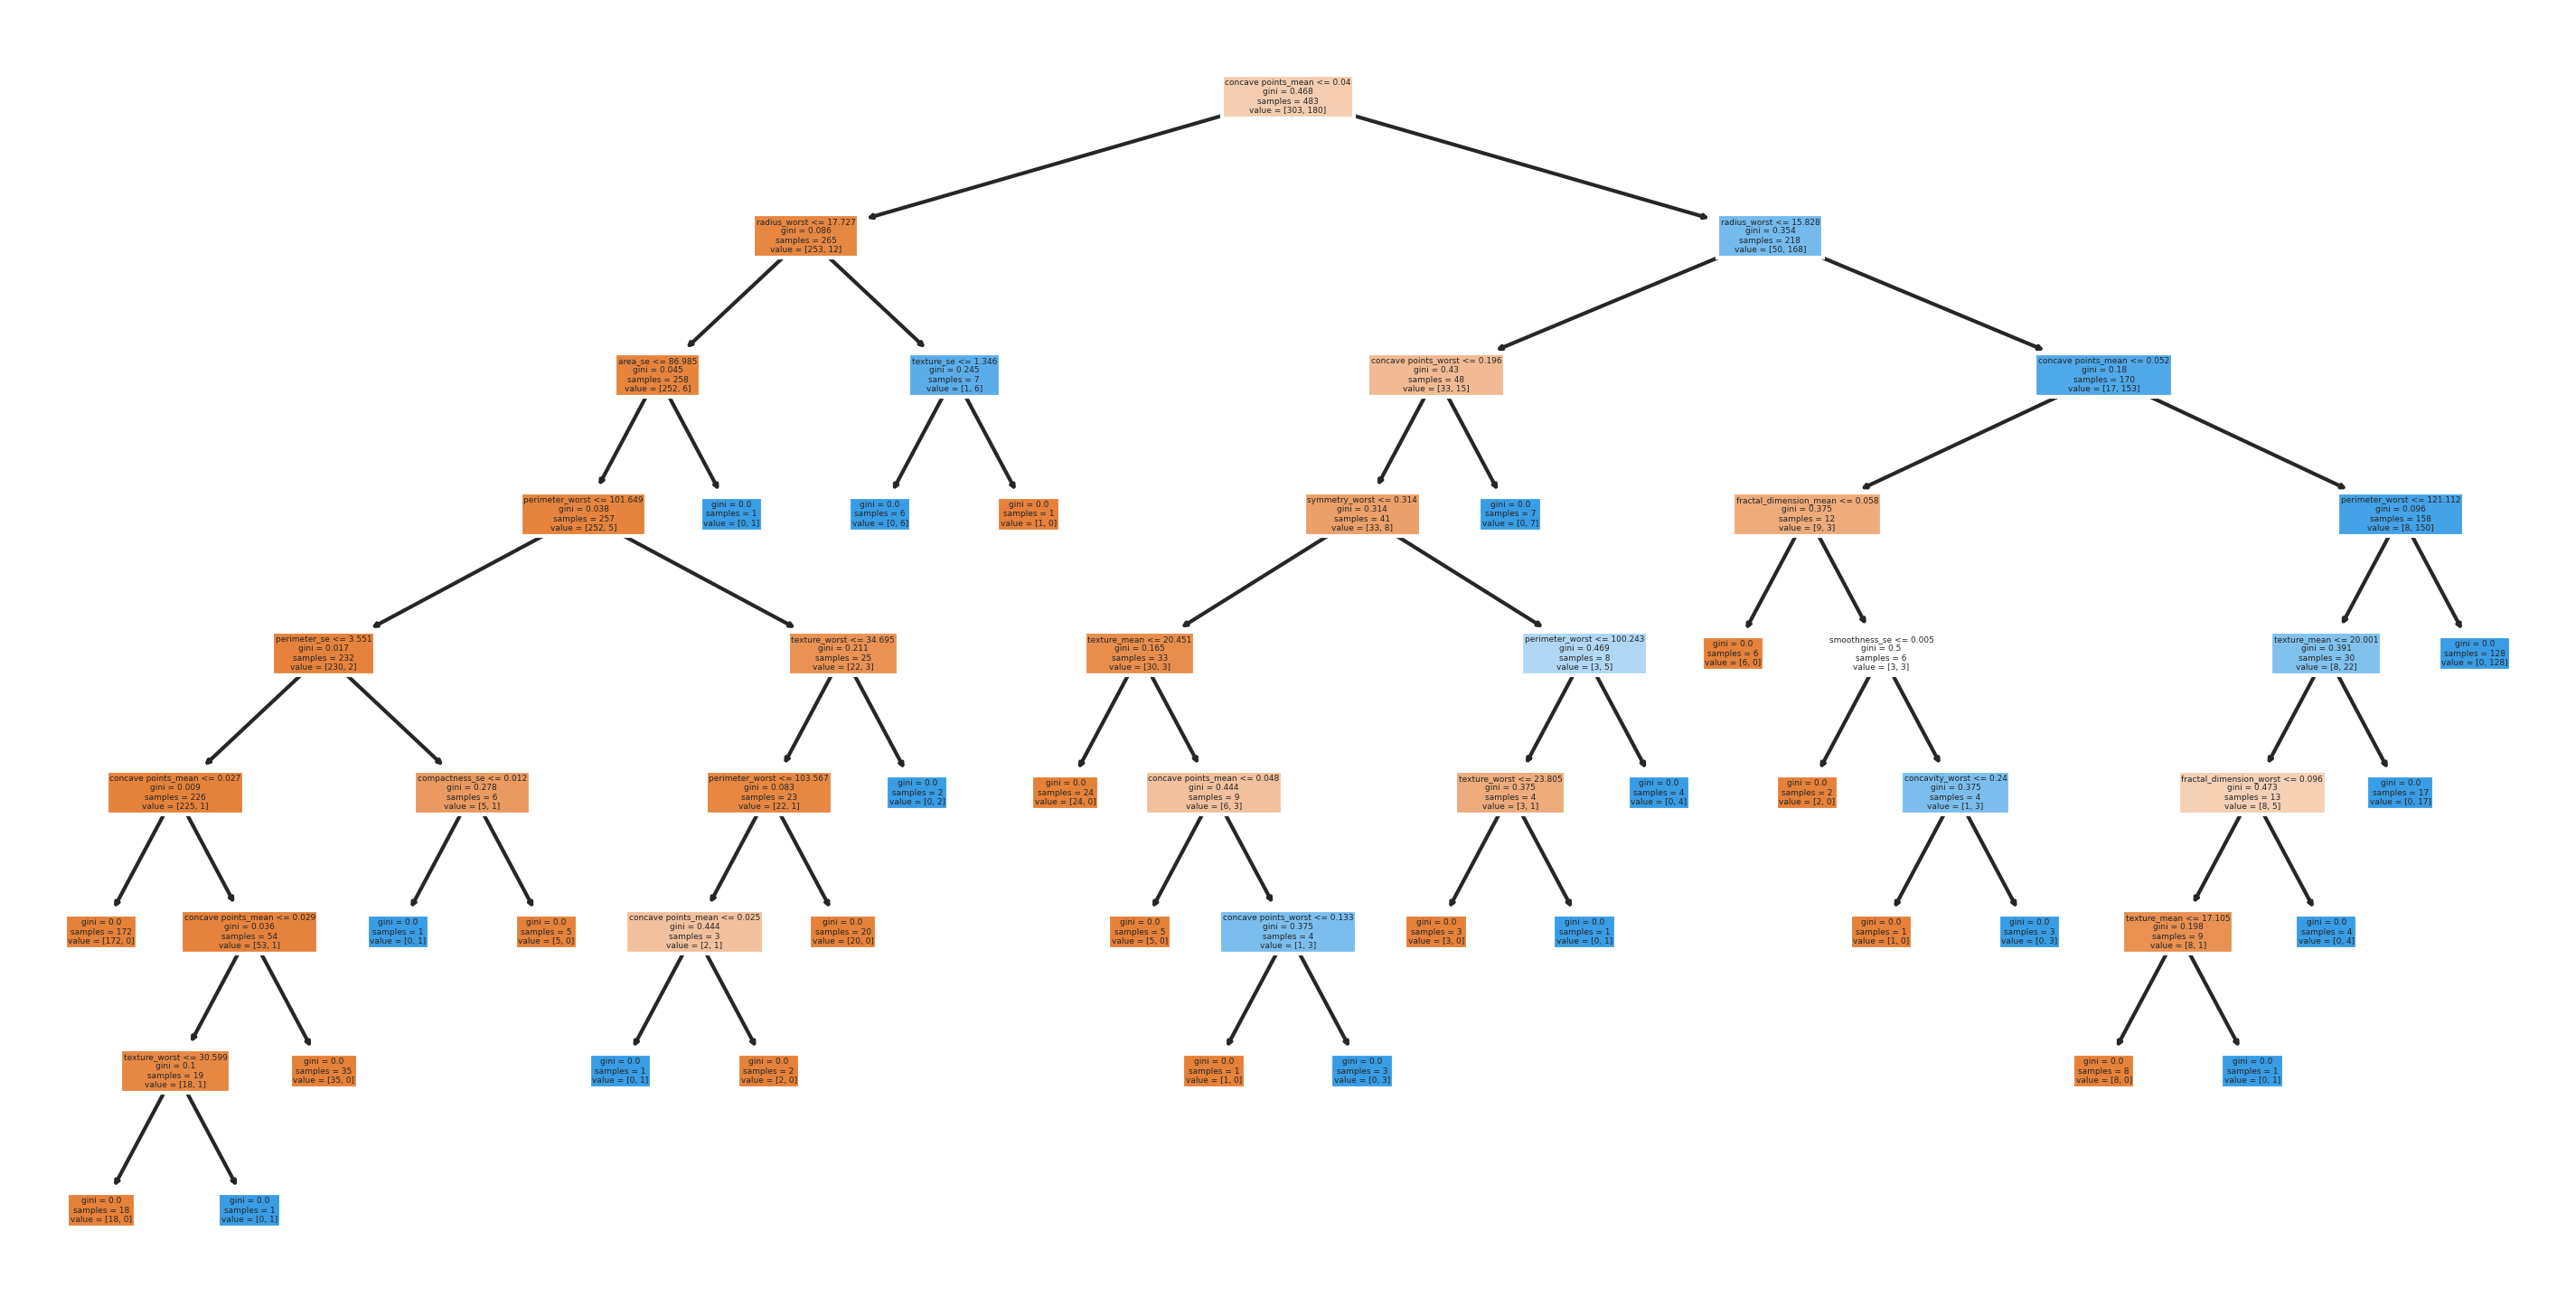

In [15]:
plt.figure(figsize=(12, 6), dpi=300)
plot_tree(best_estimator, feature_names=list(X.columns), filled=True)
plt.show()